# Calculation of Full Width Half Maximum of Data

## Half Width of Gravity Anomaly

In [28]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
FWHMs = pd.DataFrame(columns = ['Source','Data','Uncertainty'])
HalfWidths = pd.DataFrame(columns = ['Source','Data'])

In [30]:
x,anomaly = np.loadtxt('Gravity/grav_profile_array.txt',unpack=True)

In [31]:
def find_FWHM(x,anomaly,c,m,FWHM,ctr,height,FWHMdata_table,HalfWidthdata_table,magnetic=True,name=None):
    """ 
    x : list
        a list of input x values
    anomaly : list
        a list of input y values
    c : float
        a guess for the y intercept of the background counts
    m : float
        a guess for the background gradient
    ctr: float
        a guess for the centre of the peak (x coordinate)
    height : float
        a guess for the height of the peak above the background
    data_table : pandas DataFrame
        Data frame to append FWHM to
    HalfWidthdata_table : pandas DataFrame
        Data frame to append halfwidths to
    magnetic : boolean
        if true, is a magnetic anomaly
        if false, is a gravitational anomaly
    name : float
        name of model
    """
    n = len(x) # number of data points

    def f(x,m,c,FWHM,ctr,height):
        sigma = FWHM/2.3548
        return m*x+c+height*np.exp(-0.5*(x-ctr)**2/sigma**2)
        
    popt, pcov = curve_fit(f,x,anomaly,p0=[m,c,FWHM,ctr,height])

    # Fitted parameters
    print("FWHM =",popt[2],"+/-",np.sqrt(pcov[2][2]))
    
    interp = interp1d(anomaly, x, bounds_error=False, fill_value="extrapolate")

    max_loc = x[np.argmax(anomaly)]
    half_max_anom = np.max(anomaly) - (np.max(anomaly) - np.min(anomaly))
    half_max_loc = x[(np.abs(anomaly - half_max_anom)).argmin()]
    half_max = np.abs(max_loc - half_max_loc)

    print('Half Maximum: ',half_max,' m')


    FWHMdata_table.loc[len(FWHMdata_table)] = [name,popt[2],np.sqrt(pcov[2][2])]

    HalfWidthdata_table.loc[len(HalfWidthdata_table)] = [name,half_max]

    yfit = f(x,*popt) # fitted y values
    resid = anomaly - yfit # residuals
    ssr = np.sum(resid**2)

    R2 = 1-(np.var(resid)/np.var(anomaly))

    n_par = len(popt) # numer of fitted parameters
    n_df = n - n_par # degrees of freedom
    print("SSR =",ssr," n_df = ",n_df," R^2 = ",R2)

    fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,sharex=True)
    ax1.plot(x/1e3,yfit,'-',label='fit')
    ax1.scatter(x/1e3,anomaly,marker='x',label='data',alpha=0.5,s=0.5,c='r')
    if magnetic is True:
        ax1.set_ylabel('Magnetic Anomaly [nT]')
    else:
        ax1.set_ylabel('Bouguer Anomaly [mGal]')
    ax1.legend()
    ax2.scatter(x/1e3,resid,marker='x',s=0.3)
    ax2.set_xlabel('Distance [m]')
    if magnetic is True:
        ax2.set_ylabel("Residuals [nT]")
    else:
        ax2.set_ylabel("Residuals [mGal]")
    ax2.set_xlabel('Distance [km]')
    xmin = np.min(x/1e3)
    xmax = np.max(x/1e3)
    ax1.set_xlim(xmin,xmax)
    ax1.grid()
    ax2.grid()
    ax2.hlines(y=0,xmin=xmin,xmax=xmax,color='k')
    fig.tight_layout()
    return fig

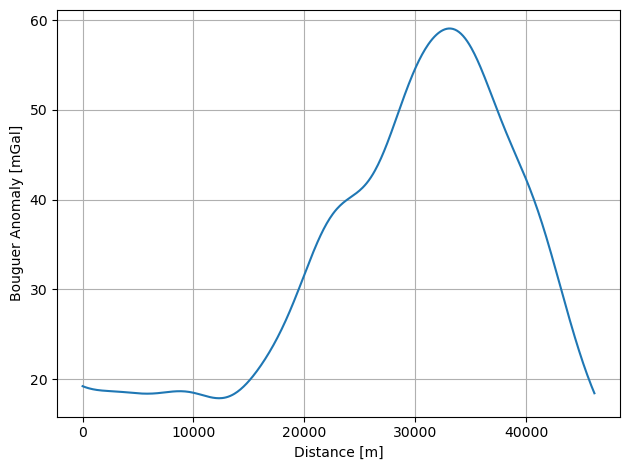

In [32]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Bouguer Anomaly [mGal]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $18 \mathrm{mGal}$
- gradient of the background: $0 \mathrm{mGal}$
- Half width: $10 \times 10^{3} \mathrm{m}$
- Centre of the peak: $33 \times 10^{3} \mathrm{m}$
- Height of the peak: $40 \mathrm{mGal}$

FWHM = 23274.844180935495 +/- 401.40116682562893
Half Maximum:  20813.435768739262  m
SSR = 1043.715272327149  n_df =  495  R^2 =  0.9900525123440177


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_48896/2980917215.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


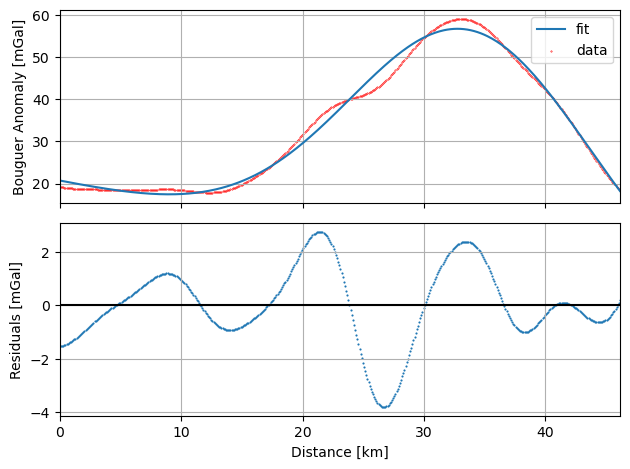

In [33]:
fig = find_FWHM(x,anomaly,18,0,10e3,33e3,40,FWHMs,HalfWidths,False,'Gravity_Obs')
fig.show()

## Half Width of Magnetic Anomaly (RTP)

In [34]:
x,anomaly = np.loadtxt('Aeromagnetic/rtp_profile_array.txt',unpack=True)

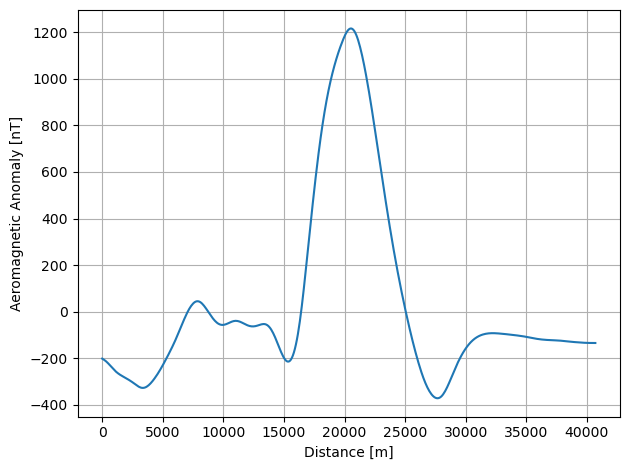

In [35]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Aeromagnetic Anomaly [nT]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $-200 \mathrm{nT}$
- gradient of the background: $0 \mathrm{nT}$
- Half width: $3.3 \times 10^{3} \mathrm{m}$
- Centre of the peak: $20 \times 10^{3} \mathrm{m}$
- Height of the peak: $1400 \mathrm{nT}$

FWHM = 5170.952139972731 +/- 78.68649213834874
Half Maximum:  7094.850869083948  m
SSR = 4888025.725027551  n_df =  495  R^2 =  0.9412274343423609


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_48896/3615497736.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


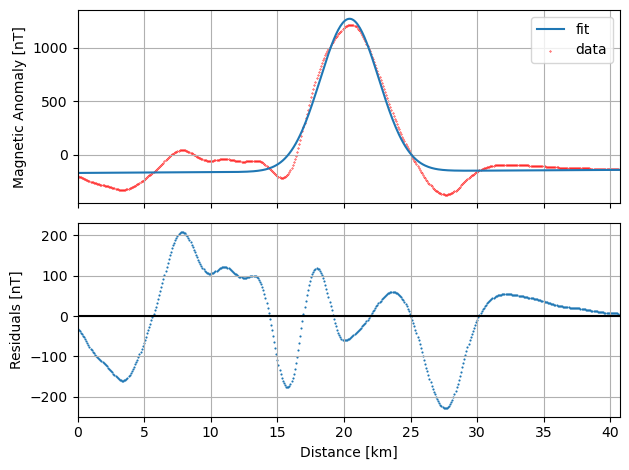

In [36]:
fig = find_FWHM(x,anomaly,-200,0,3.3e3,20e3,1400,FWHMs,HalfWidths,name='RTP')
fig.show()

## Half Width of Magnetic Anomaly (original)

In [37]:
x,anomaly = np.loadtxt('Aeromagnetic/norm_profile_array.txt',unpack=True)

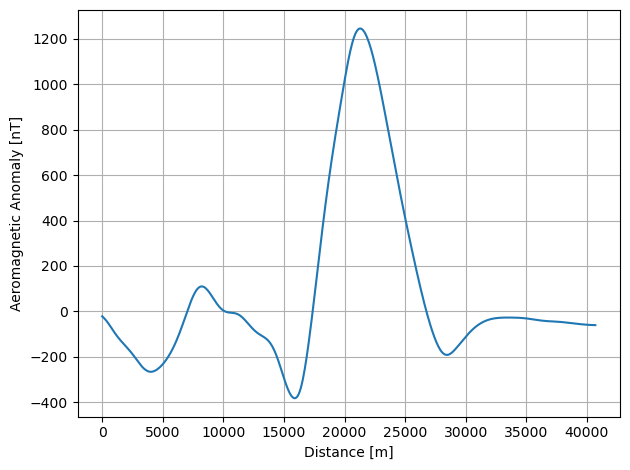

In [38]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Aeromagnetic Anomaly [nT]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $-200 \mathrm{nT}$
- gradient of the background: $0 \mathrm{nT}$
- Half width: $3.3 \times 10^{3} \mathrm{m}$
- Centre of the peak: $20 \times 10^{3} \mathrm{m}$
- Height of the peak: $1400 \mathrm{nT}$

FWHM = 5133.256036694222 +/- 85.4484601803679
Half Maximum:  5382.300659305065  m
SSR = 5415360.510154941  n_df =  495  R^2 =  0.9312142225084448


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_48896/372012059.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


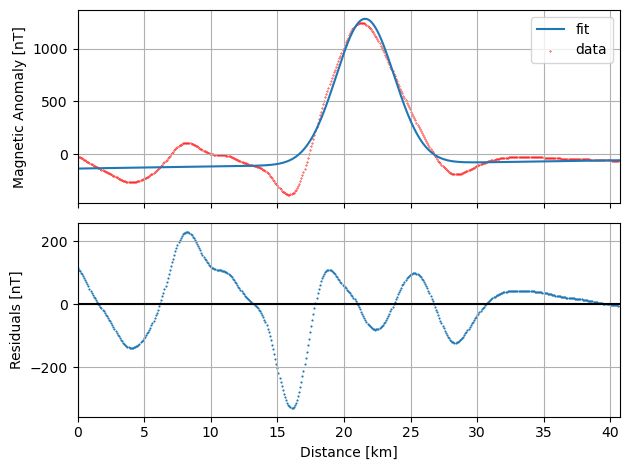

In [39]:
fig = find_FWHM(x,anomaly,-200,0,3.3e3,20e3,1400,FWHMs,HalfWidths,name='Mag_Norm')
fig.show()

# Half Width of Forward Modelled Responses

## Half Width of Extended Gravity Anomaly (Model 1)

In [40]:
x,anomaly = np.loadtxt('Modelling/Gravity/GravModel1_extended.txt',unpack=True,usecols=[0,1])

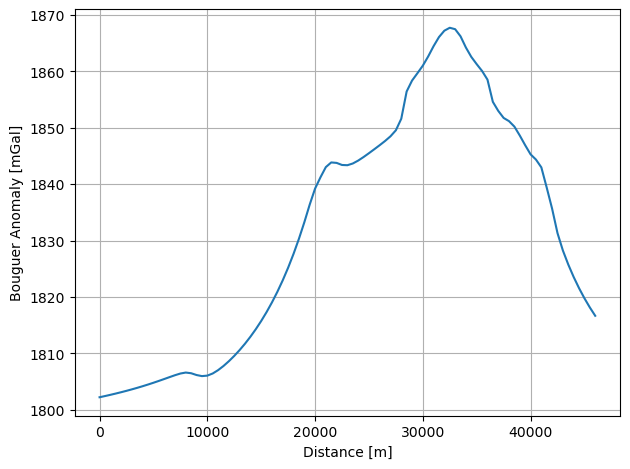

In [41]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Bouguer Anomaly [mGal]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $1.8 \times 10^3 \mathrm{mGal}$
- gradient of the background: $0 \mathrm{mGal}$
- Half width: $10 \times 10^{3} \mathrm{m}$
- Centre of the peak: $35 \times 10^{3} \mathrm{m}$
- Height of the peak: $60 \mathrm{mGal}$

FWHM = 32001.952612662157 +/- 2961.078311657435
Half Maximum:  32500.0  m
SSR = 769.8307266565167  n_df =  88  R^2 =  0.9822616913547877


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_48896/3280888251.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


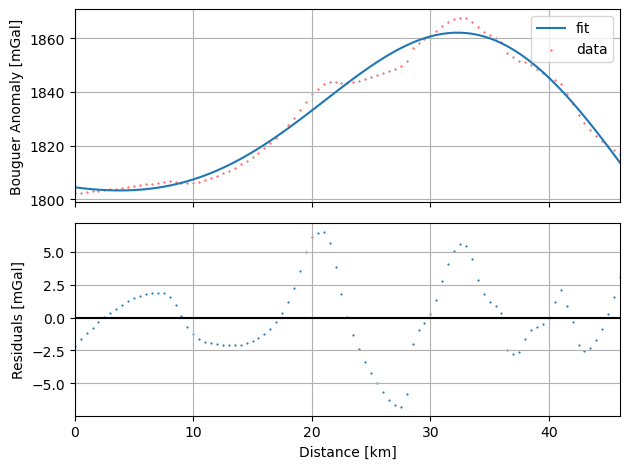

In [42]:
fig = find_FWHM(x,anomaly,1.8e3,0,10e3,35e3,60,FWHMs,HalfWidths,False,name='Grav1')
fig.show()

## Half Width of Extended Gravity Anomaly (Model 2)

In [43]:
x,anomaly = np.loadtxt('Modelling/Gravity/GravModel2_ext.txt',unpack=True,usecols=[0,1])

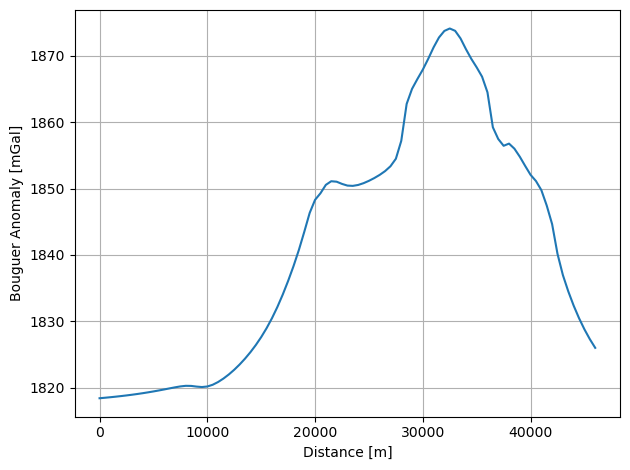

In [44]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Bouguer Anomaly [mGal]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $1.83 \times 10^3 \mathrm{mGal}$
- gradient of the background: $0 \mathrm{mGal}$
- Half width: $10 \times 10^{3} \mathrm{m}$
- Centre of the peak: $35 \times 10^{3} \mathrm{m}$
- Height of the peak: $55 \mathrm{mGal}$

FWHM = 31742.414550100442 +/- 3751.1694376731607
Half Maximum:  32500.0  m
SSR = 948.968166818369  n_df =  88  R^2 =  0.9695802005552805


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_48896/988022675.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


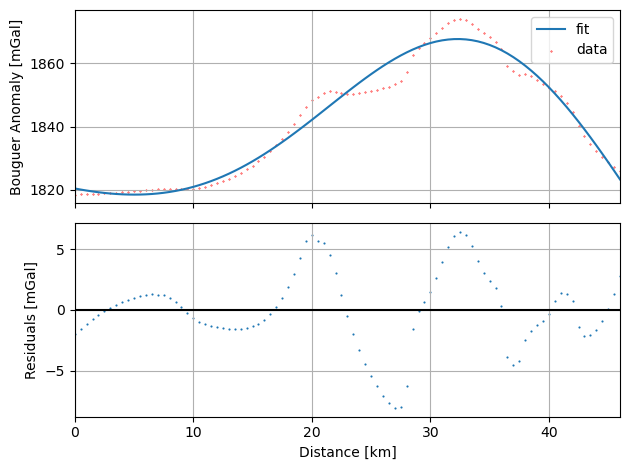

In [45]:
fig = find_FWHM(x,anomaly,1.83e3,0,10e3,35e3,55,FWHMs,HalfWidths,False,name='Grav2')
fig.show()

## Half Width of Magnetic Model 1 (2.75D)

In [46]:
x,anomaly = np.loadtxt('Modelling/Gravity/Mag_Model1.txt',unpack=True,usecols=[0,1])

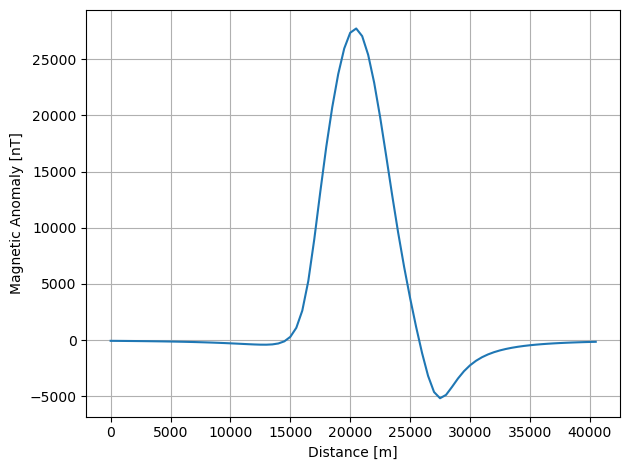

In [47]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Magnetic Anomaly [nT]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $0 \mathrm{nT}$
- gradient of the background: $0 \mathrm{nT}$
- Half width: $3.3 \times 10^{3} \mathrm{m}$
- Centre of the peak: $20 \times 10^{3} \mathrm{m}$
- Height of the peak: $2.5 \times 10^4 \mathrm{nT}$

FWHM = 5489.96719539947 +/- 121.68801401472949
Half Maximum:  7000.0  m
SSR = 119411368.88087235  n_df =  77  R^2 =  0.9797382941300166


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_48896/3663822399.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


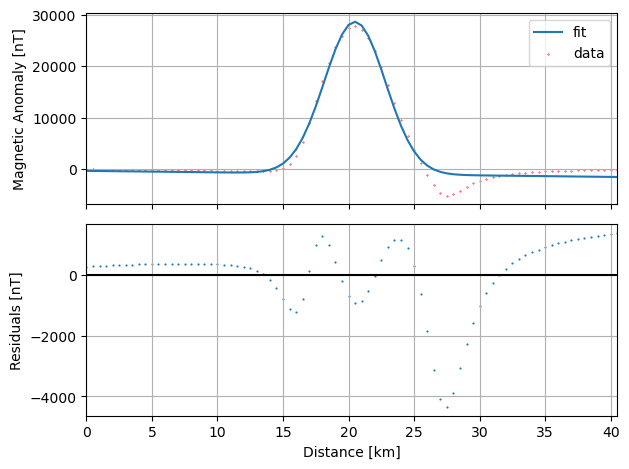

In [48]:
fig = find_FWHM(x,anomaly,0,0,3.3e3,20e3,2.5e4,FWHMs,HalfWidths,name='Mag1')
fig.show()

## Half Width of Magnetic Model 2 (2.75D)

In [49]:
x,anomaly = np.loadtxt('Modelling/Gravity/Mag_Model2.txt',unpack=True,usecols=[0,1])

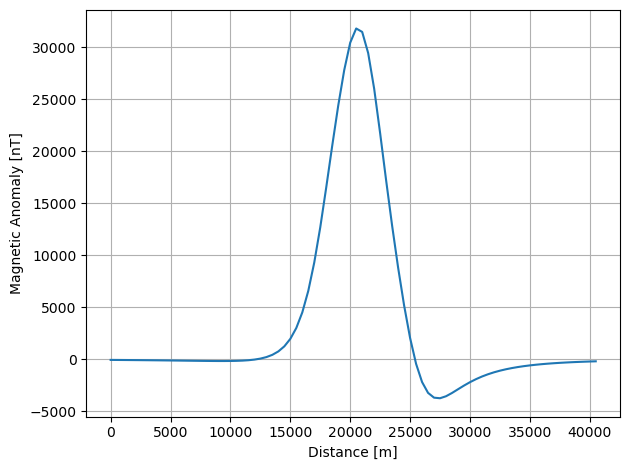

In [50]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Magnetic Anomaly [nT]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $0 \mathrm{nT}$
- gradient of the background: $0 \mathrm{nT}$
- Half width: $3.3 \times 10^{3} \mathrm{m}$
- Centre of the peak: $20 \times 10^{3} \mathrm{m}$
- Height of the peak: $3 \times 10^4 \mathrm{nT}$

FWHM = 5215.219393739264 +/- 91.49189245522813
Half Maximum:  7000.0  m
SSR = 87940207.76779634  n_df =  77  R^2 =  0.9872627512492098


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_48896/399437210.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


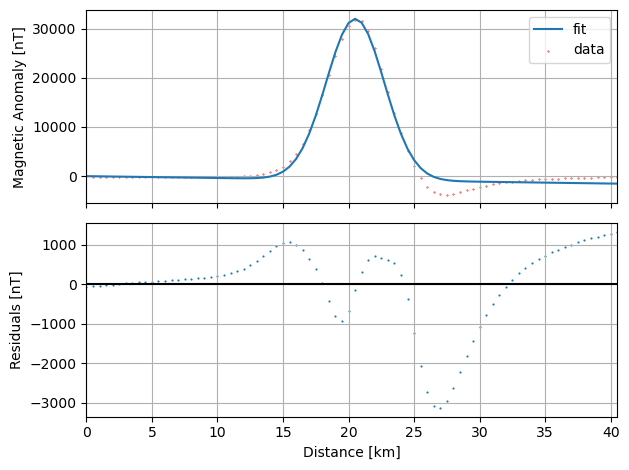

In [51]:
fig = find_FWHM(x,anomaly,0,0,3.3e3,20e3,3e4,FWHMs,HalfWidths,name='Mag2')
fig.show()

## Half Width of Magnetic Model 3 (2.75D)

In [52]:
x,anomaly = np.loadtxt('Modelling/Gravity/Mag_Model3.txt',unpack=True,usecols=[0,1])

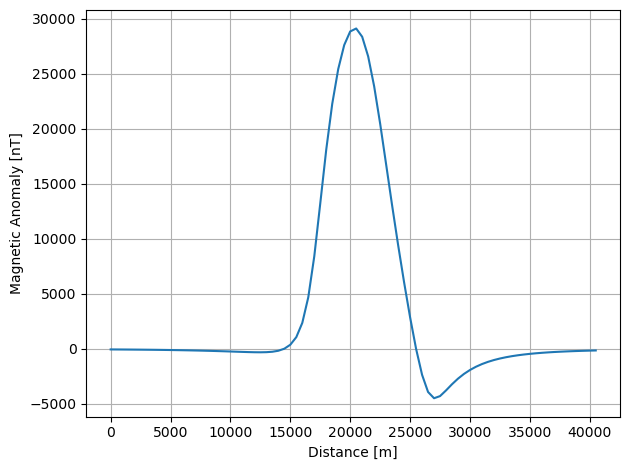

In [53]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Magnetic Anomaly [nT]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $0 \mathrm{nT}$
- gradient of the background: $0 \mathrm{nT}$
- Half width: $3.3 \times 10^{3} \mathrm{m}$
- Centre of the peak: $20 \times 10^{3} \mathrm{m}$
- Height of the peak: $2.75 \times 10^4 \mathrm{nT}$

FWHM = 5319.057572114914 +/- 108.45342756348882
Half Maximum:  6500.0  m
SSR = 110012098.85312027  n_df =  77  R^2 =  0.9828370819458903


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_48896/1150553652.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


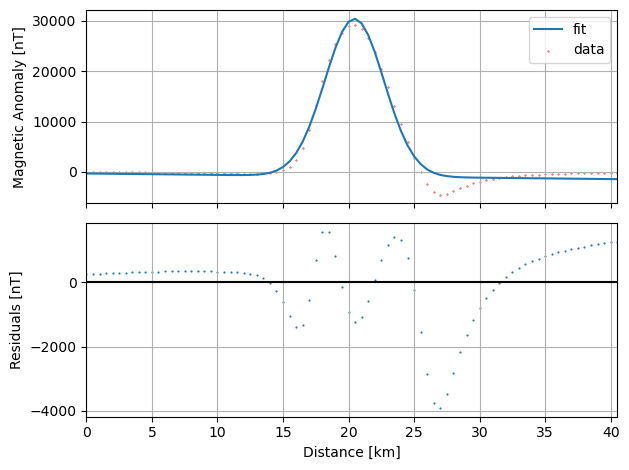

In [54]:
fig = find_FWHM(x,anomaly,0,0,3.3e3,20e3,2.75e4,FWHMs,HalfWidths,name='Mag3')
fig.show()

## Mag Models 2.5D

In [55]:
x,anomaly = np.loadtxt('Modelling/Gravity/MagModel1_rho.txt',unpack=True,usecols=[0,1])

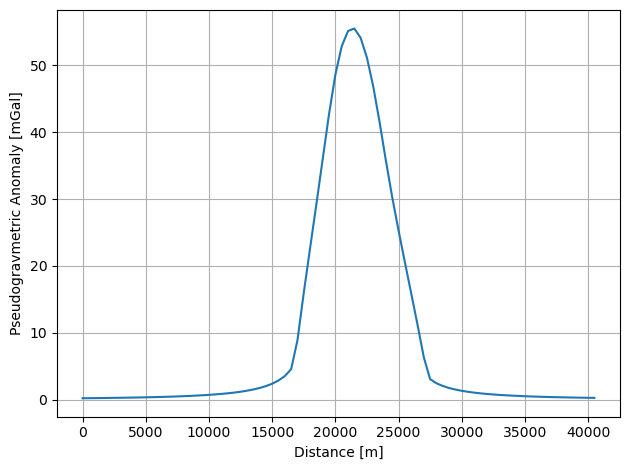

In [56]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Pseudogravmetric Anomaly [mGal]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $0 \mathrm{mGal}$
- gradient of the background: $0 \mathrm{mGal}$
- Half width: $3.3 \times 10^{3} \mathrm{m}$
- Centre of the peak: $22 \times 10^{3} \mathrm{m}$
- Height of the peak: $55 \mathrm{mGal}$

FWHM = 6118.900622712157 +/- 57.00177573490248
Half Maximum:  21500.0  m
SSR = 81.40040691593663  n_df =  77  R^2 =  0.9963410138117834


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_48896/3715593061.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


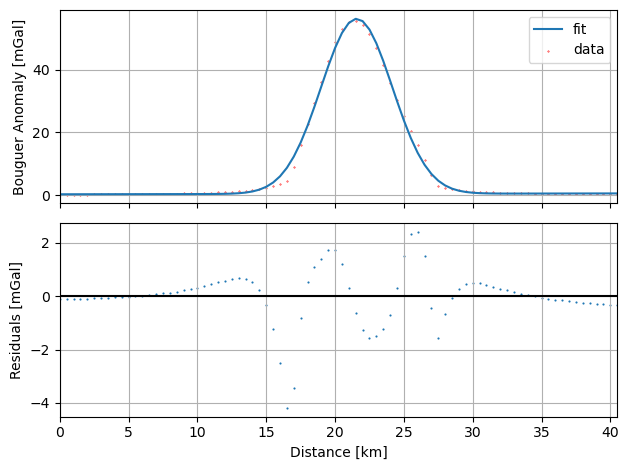

In [57]:
fig = find_FWHM(x,anomaly,0,0,3.3e3,22e3,55,FWHMs,HalfWidths,False,name='Mag1_2.5')
fig.show()

## Half Width of Magnetic Model 2 (2.5D)

In [58]:
x,anomaly = np.loadtxt('Modelling/Gravity/MagModel2_rho.txt',unpack=True,usecols=[0,1])

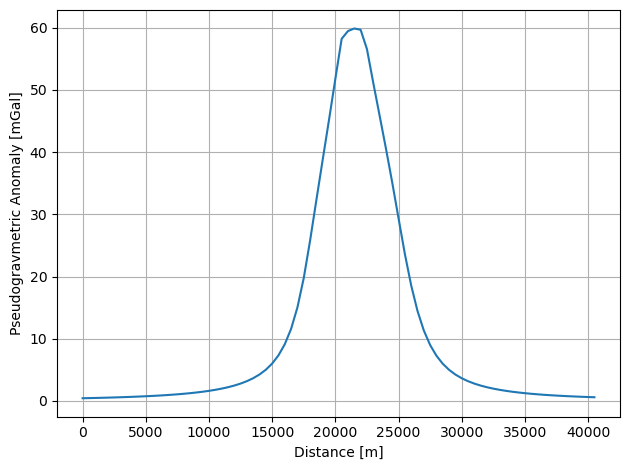

In [59]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Pseudogravmetric Anomaly [mGal]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $0 \mathrm{mGal}$
- gradient of the background: $0 \mathrm{mGal}$
- Half width: $3.3 \times 10^{3} \mathrm{m}$
- Centre of the peak: $22 \times 10^{3} \mathrm{m}$
- Height of the peak: $55 \mathrm{mGal}$

FWHM = 6571.444581961872 +/- 52.61482388869491
Half Maximum:  21500.0  m
SSR = 69.33536390806465  n_df =  77  R^2 =  0.9972847349165638


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_48896/438990991.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


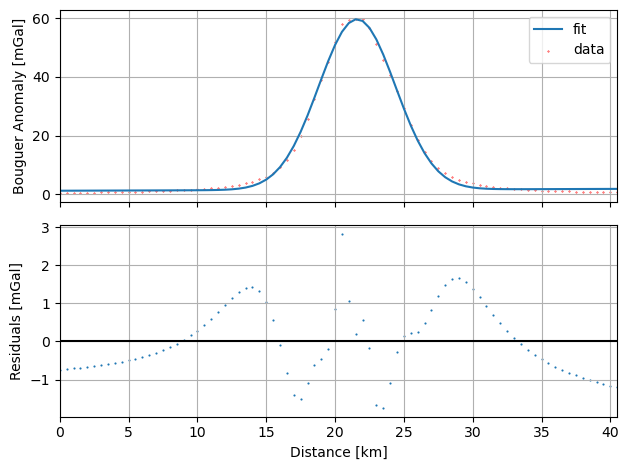

In [60]:
fig = find_FWHM(x,anomaly,0,0,3.3e3,22e3,55,FWHMs,HalfWidths,False,name='Mag2_2.5')
fig.show()

## Half Width of Magnetic Model 3 (2.5D)

In [61]:
x,anomaly = np.loadtxt('Modelling/Gravity/MagModel3_rho.txt',unpack=True,usecols=[0,1])

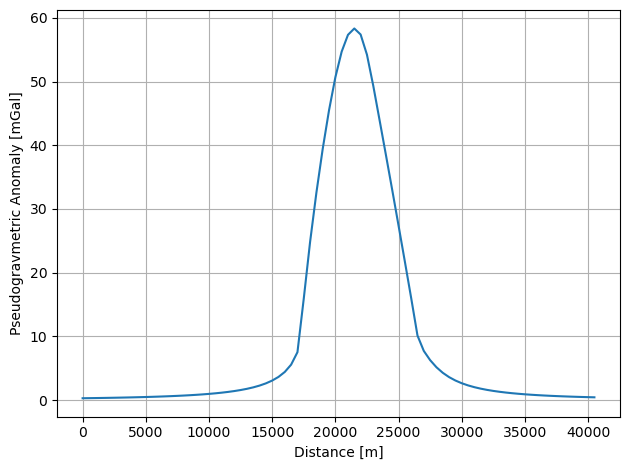

In [62]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Pseudogravmetric Anomaly [mGal]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $0 \mathrm{mGal}$
- gradient of the background: $0 \mathrm{mGal}$
- Half width: $3.3 \times 10^{3} \mathrm{m}$
- Centre of the peak: $22 \times 10^{3} \mathrm{m}$
- Height of the peak: $55 \mathrm{mGal}$

FWHM = 6165.307386865235 +/- 67.71284370731291
Half Maximum:  21500.0  m
SSR = 123.9135943852352  n_df =  77  R^2 =  0.9949255652103697


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_48896/1336062162.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


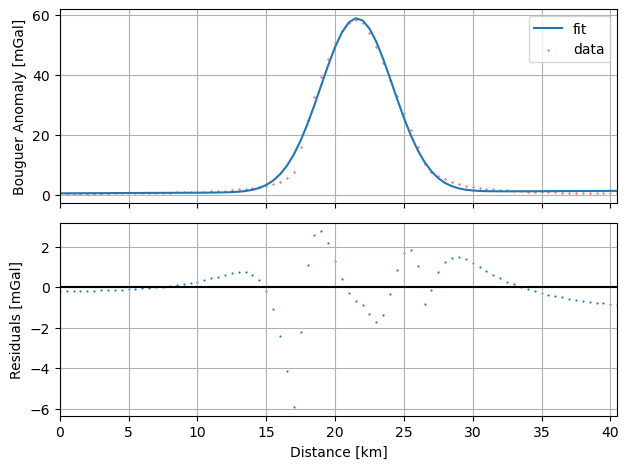

In [63]:
fig = find_FWHM(x,anomaly,0,0,3.3e3,22e3,55,FWHMs,HalfWidths,False,'Mag3_2.5')
fig.show()

# FWHM of Bot Observations

## Pseudogravimetric

In [64]:
x,anomaly = np.loadtxt('BottMag_coords.csv',unpack=True,usecols=[0,1],delimiter=',')

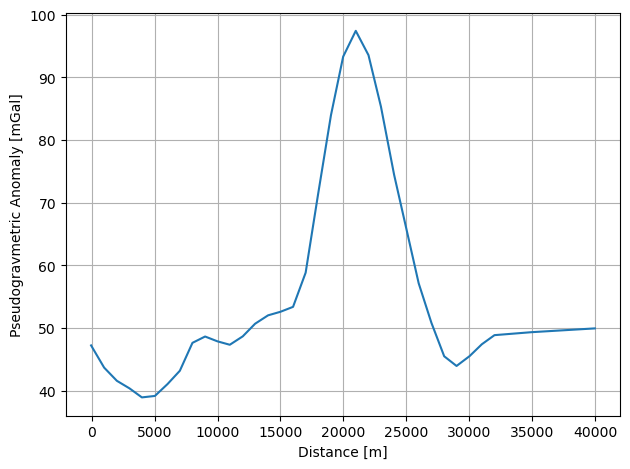

In [65]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Pseudogravmetric Anomaly [mGal]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

FWHM = 6288.927217435449 +/- 268.65131303342264
Half Maximum:  16996.311971651096  m
SSR = 257.3156453386566  n_df =  30  R^2 =  0.9727961747269581


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_48896/1543850748.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


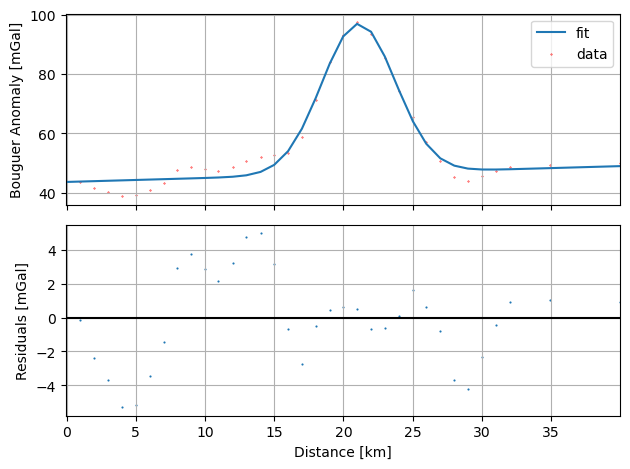

In [66]:
fig = find_FWHM(x,anomaly,40,0,3.3e3,22e3,60,FWHMs,HalfWidths,False,'BottMag')
fig.show()

## Gravity

In [67]:
x,anomaly = np.loadtxt('BottGrav_coords.csv',unpack=True,usecols=[0,1],delimiter=',')

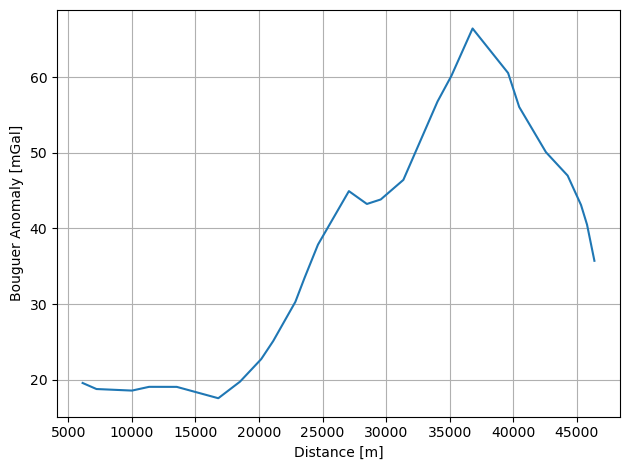

In [68]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Bouguer Anomaly [mGal]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

FWHM = 28947.8181536721 +/- 8223.996872081167
Half Maximum:  19995.967741935496  m
SSR = 161.69486178416253  n_df =  21  R^2 =  0.9728902051570746


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_48896/3777212071.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


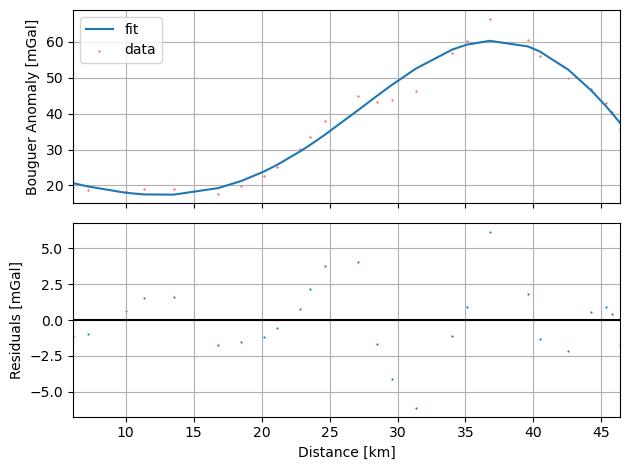

In [69]:
fig = find_FWHM(x,anomaly,20,0,10e3,37e3,55,FWHMs,HalfWidths,False,name='BottGrav')
fig.show()

In [70]:
FWHMs.to_csv('FWHMs.csv',',')
HalfWidths.to_csv('HalfWidths.csv',',')

/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_48896/1854967150.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_csv except for the argument 'path_or_buf' will be keyword-only.
  FWHMs.to_csv('FWHMs.csv',',')
/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_48896/1854967150.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_csv except for the argument 'path_or_buf' will be keyword-only.
  HalfWidths.to_csv('HalfWidths.csv',',')
